In [65]:
data <- read.csv("Data_T3.csv")

In [66]:
# a first look at the data
head(data)
summary(data)

,X,Dose,GE_content
,<int>,<int>,<dbl>
1,1,5,17.45
2,2,5,23.54
3,3,5,20.32
4,4,5,9.91
5,5,5,16.62
6,6,5,18.27


       X              Dose          GE_content   
 Min.   : 1.00   Min.   :  5.00   Min.   : 7.78  
 1st Qu.:15.75   1st Qu.: 10.00   1st Qu.:28.56  
 Median :30.50   Median : 35.00   Median :52.20  
 Mean   :30.50   Mean   : 55.83   Mean   :53.43  
 3rd Qu.:45.25   3rd Qu.:100.00   3rd Qu.:80.17  
 Max.   :60.00   Max.   :150.00   Max.   :93.45  

In [67]:
dim(data)

[1] 60  3

In [68]:
unique(data$Dose)

[1]   5  10  20  50 100 150

In [69]:
data_low <- subset(data, Dose %in% c(5, 10, 20))

In [70]:
library(ggplot2)
library(dplyr)
library(car)

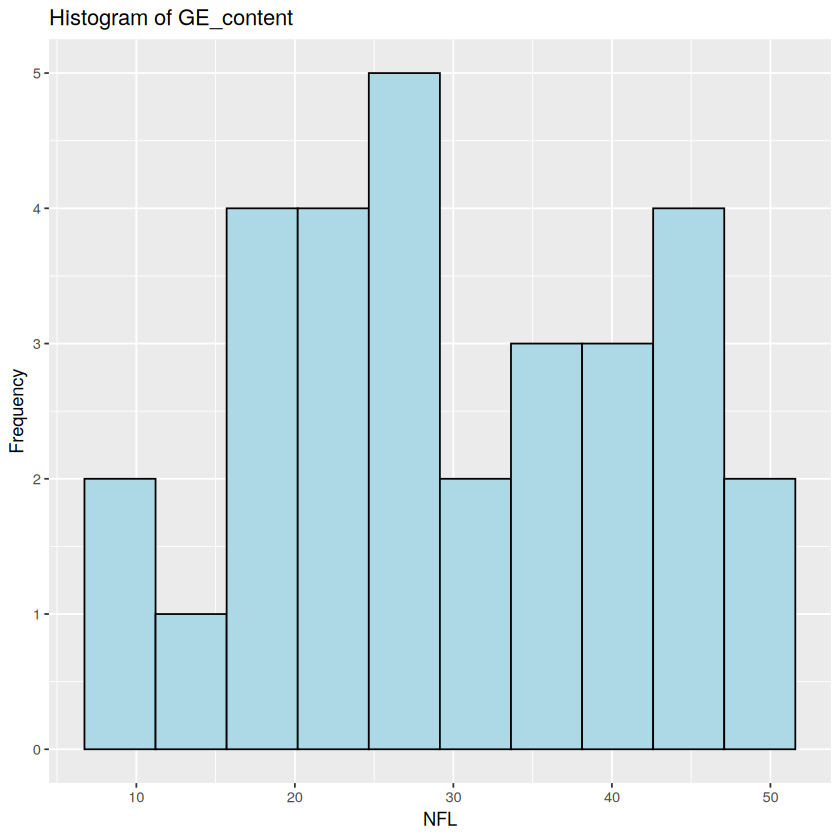

In [71]:
# Create a histogram
ggplot(data_low, aes(x = GE_content)) +
  geom_histogram(bins = 10, color = "black", fill = "lightblue") +
  labs(title = "Histogram of GE_content", x = "NFL", y = "Frequency")


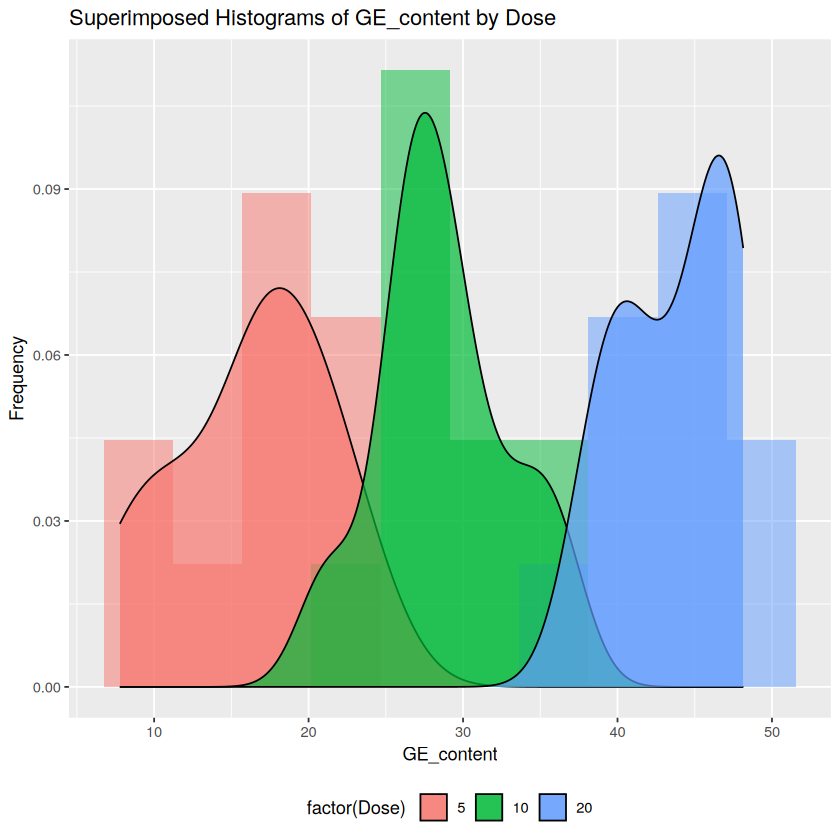

In [72]:
#histogram with density curves for each dosage level.

ggplot(data_low, aes(x = GE_content, fill = factor(Dose))) +
  geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
  geom_density(alpha = 0.7) +
  labs(title = "Superimposed Histograms of GE_content by Dose", x = "GE_content", y = "Frequency") +
  theme(legend.position = "bottom")


In [73]:
# #Separate panels for each dosage level

# ggplot(data_low, aes(x = GE_content)) +
#   geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
#   geom_density(alpha = 0.7) +
#   facet_wrap(~ Dose) +
#   labs(title = "Histograms of GE_content by Dose", x = "GE_content", y = "Frequency")


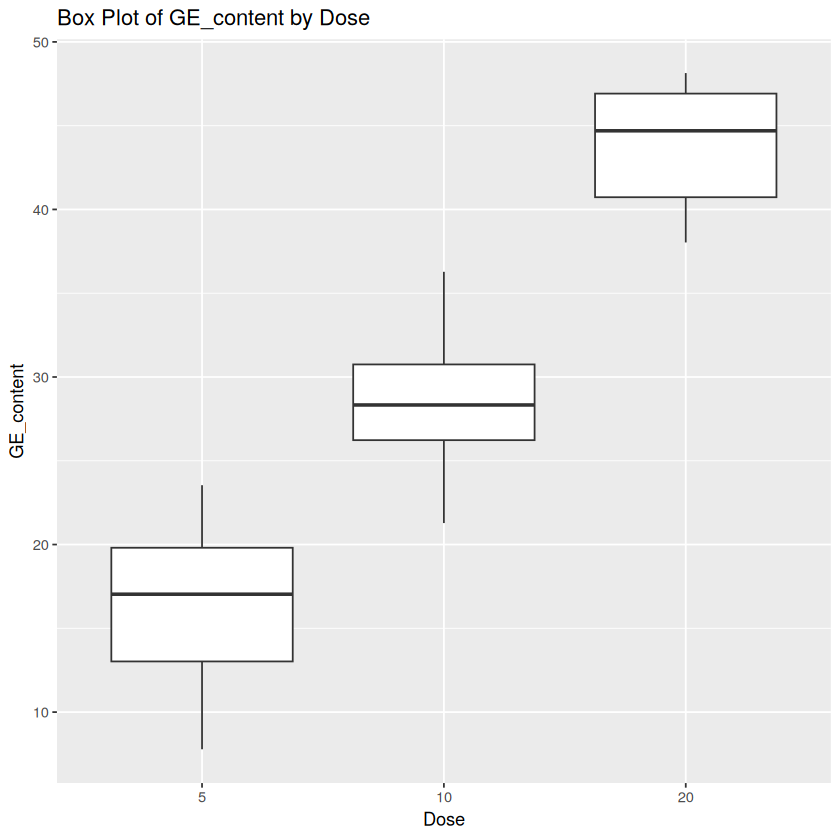

In [74]:
ggplot(data_low, aes(x = factor(Dose), y = GE_content)) +
  geom_boxplot() +
  labs(title = "Box Plot of GE_content by Dose", x = "Dose", y = "GE_content")


In [75]:
library(drc)
library(RColorBrewer)
library(tidyr)

In [76]:
# Fit Emax model
model <- drm(GE_content ~ Dose, data = data_low, robust = 'mean',  fct = LL.4(names = c("Hill slope", "Min", "Max", "EC50")))
print(model)


A 'drc' model.

Call:
drm(formula = GE_content ~ Dose, data = data_low, fct = LL.4(names = c("Hill slope",     "Min", "Max", "EC50")), robust = "mean")

Coefficients:
Hill slope:(Intercept)         Min:(Intercept)         Max:(Intercept)  
                -2.393                  11.180                  52.043  
      EC50:(Intercept)  
                11.257  



In [77]:
summary(model)[[3]] 

,Estimate,Std. Error,t-value,p-value
Hill slope:(Intercept),-2.393099,509.4286,-0.004697614,0.9962877
Min:(Intercept),11.180372,2146.8262,0.005207861,0.9958845
Max:(Intercept),52.043178,3784.0094,0.013753448,0.9891317
EC50:(Intercept),11.257166,472.2559,0.023837005,0.9811646


In [78]:
confint(model, level = 0.90)

,5 %,95 %
Hill slope:(Intercept),-871.2837,866.4975
Min:(Intercept),-3650.4848,3672.8455
Max:(Intercept),-6402.0311,6506.1175
EC50:(Intercept),-794.2309,816.7453


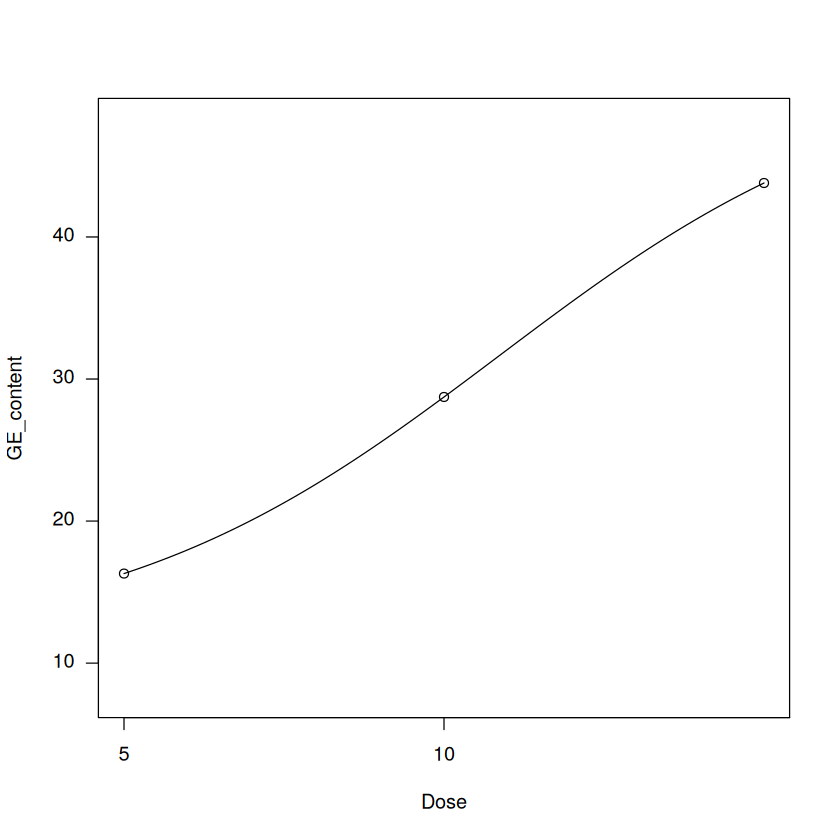

In [79]:
plot(model)

In [ ]:
# Predict the dose that produces 80% gastric retention
ED(model, 80)


Estimated effective doses

       Estimate Std. Error
e:1:80   20.091   3320.446


In [107]:
# Predict the dose that produces 80% gastric retention
ED(model, 50)


Estimated effective doses

       Estimate Std. Error
e:1:50   11.257    472.256


In [ ]:
data_nu <- read.csv("Data_T3B.csv")
# a first look at the data
head(data_nu)
summary(data_nu)

,GE_content_50mg,GE_content_100mg,GE_content_150mg
,<dbl>,<dbl>,<dbl>
1,67.62,78.48,85.09
2,64.72,80.98,82.11
3,63.68,78.03,91.71
4,68.87,88.05,91.90
5,63.50,78.97,82.97
6,62.10,79.97,83.92


 GE_content_50mg GE_content_100mg GE_content_150mg
 Min.   :56.25   Min.   :74.96    Min.   :82.11   
 1st Qu.:63.55   1st Qu.:78.60    1st Qu.:83.03   
 Median :64.55   Median :80.38    Median :83.94   
 Mean   :64.13   Mean   :81.46    Mean   :86.13   
 3rd Qu.:65.21   3rd Qu.:83.62    3rd Qu.:90.06   
 Max.   :68.87   Max.   :89.89    Max.   :93.45   

In [99]:
# Load data_nu
data_nu <- read.csv("Data_T3B.csv")

# Transform data_nu
data_nu_transformed <- data_nu %>%
  pivot_longer(
    cols = c(GE_content_50mg, GE_content_100mg, GE_content_150mg),
    names_to = "Dose",
    values_to = "GE_content"
  ) %>%
  mutate(
    Dose = as.integer(gsub("GE_content_", "", gsub("mg", "", Dose))),
    X = row_number()
  )

# View the transformed data
head(data_nu_transformed)

Dose,GE_content,X
<int>,<dbl>,<int>
50,67.62,1
100,78.48,2
150,85.09,3
50,64.72,4
100,80.98,5
150,82.11,6


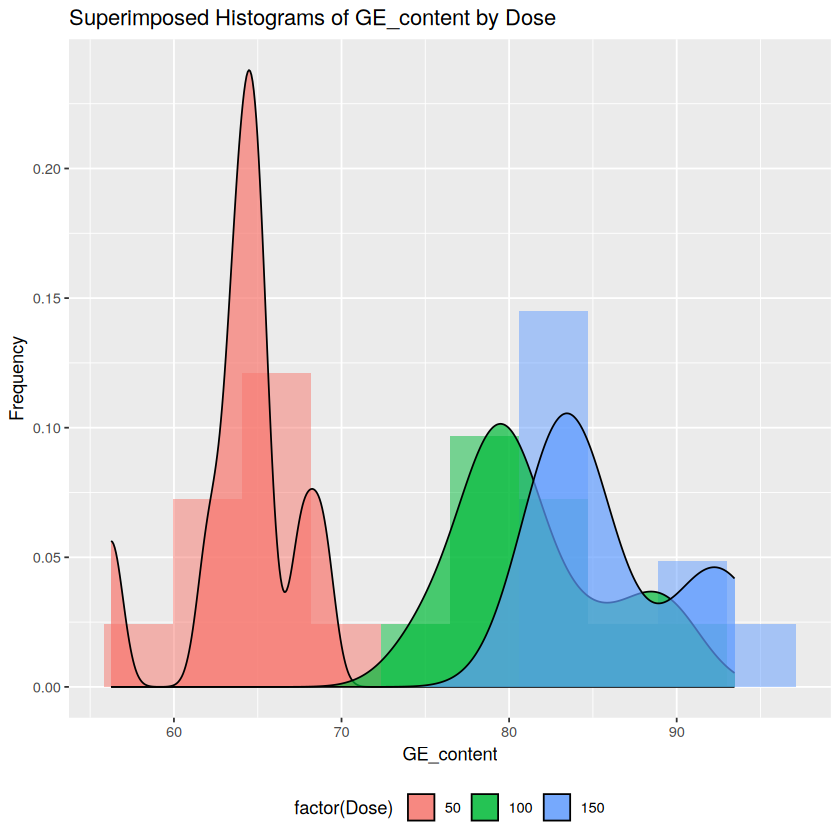

In [100]:
#histogram with density curves for each dosage level.

ggplot(data_nu_transformed, aes(x = GE_content, fill = factor(Dose))) +
  geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
  geom_density(alpha = 0.7) +
  labs(title = "Superimposed Histograms of GE_content by Dose", x = "GE_content", y = "Frequency") +
  theme(legend.position = "bottom")


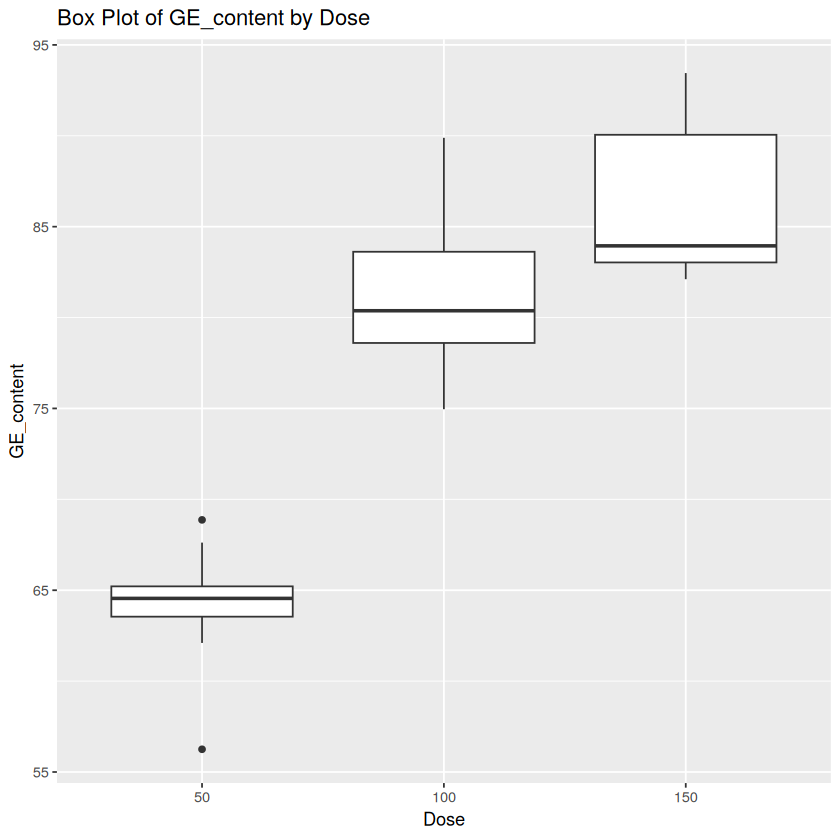

In [101]:
ggplot(data_nu_transformed, aes(x = factor(Dose), y = GE_content)) +
  geom_boxplot() +
  labs(title = "Box Plot of GE_content by Dose", x = "Dose", y = "GE_content")


In [104]:
# # Create a new column for dose values
# data_long$Dose <- as.numeric(data_long$Dose)

# # Fit Emax model
# model1 <- drm(GE_content ~ Dose, data = data_nu_transformed, robust = 'mean',  fct = LL.4(names = c("Hill slope", "Min", "Max", "EC50")))
# print(model1)

In [105]:
# plot(model1)

In [106]:
# ED(model1, 80)

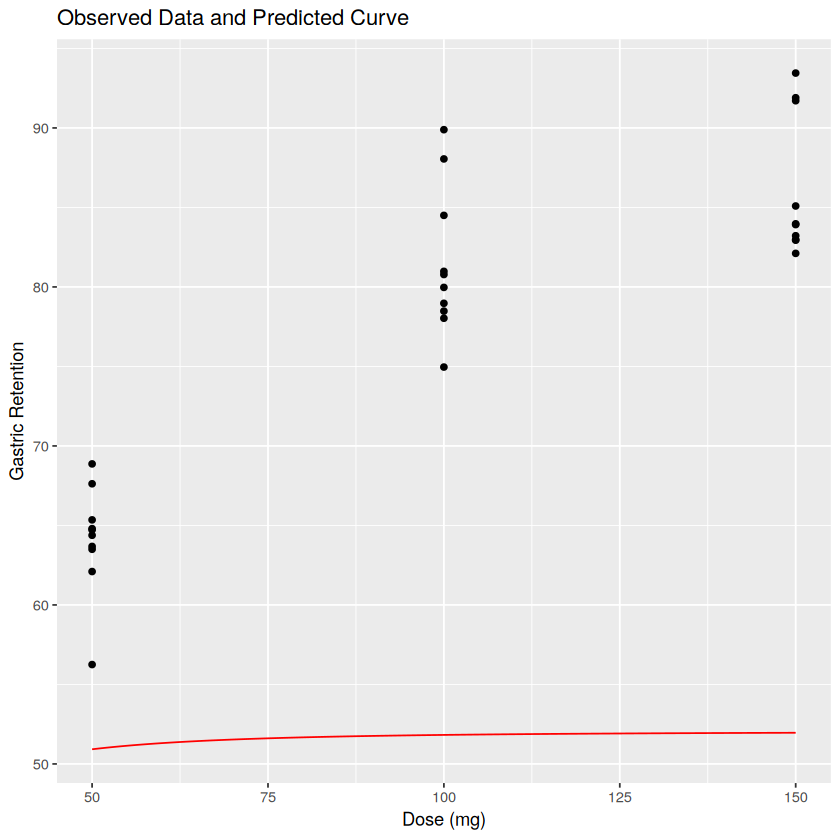

In [92]:
# Load necessary libraries
library(ggplot2)

# Create a data frame for plotting
plot_data <- data.frame(
  Dose = c(rep(50, nrow(data_nu)), rep(100, nrow(data_nu)), rep(150, nrow(data_nu))),
  GE_content = c(data_nu$GE_content_50mg, data_nu$GE_content_100mg, data_nu$GE_content_150mg)
)

# Create a plot of the observed data and the predicted curve
ggplot(plot_data, aes(x = Dose, y = GE_content)) +
  geom_point() +
  stat_function(fun = function(x) {
    model$coefficients[2] + (model$coefficients[3] - model$coefficients[2]) / (1 + (x / model$coefficients[4]) ^ model$coefficients[1])
  }, color = "red") +
  labs(title = "Observed Data and Predicted Curve", 
       x = "Dose (mg)", 
       y = "Gastric Retention") +
  theme(legend.position = "none")


In [108]:
# Predict gastric retention for new dose levels
new_doses <- data.frame(Dose = c(50, 100, 150))
predictions <- predict(model, new_doses)

In [109]:
# Print the predictions
print(predictions)


[1] 50.92215 51.82492 51.96019


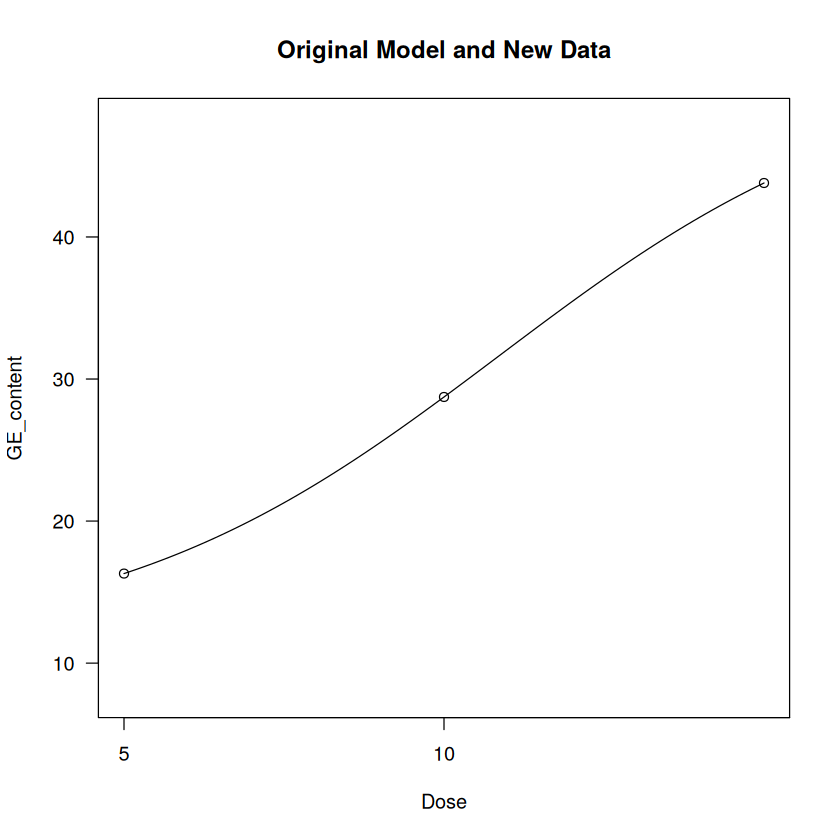

In [97]:
# Plot the original data and the new data
plot(model, main = "Original Model and New Data")
points(plot_data$Dose, plot_data$GE_content, col = "red")

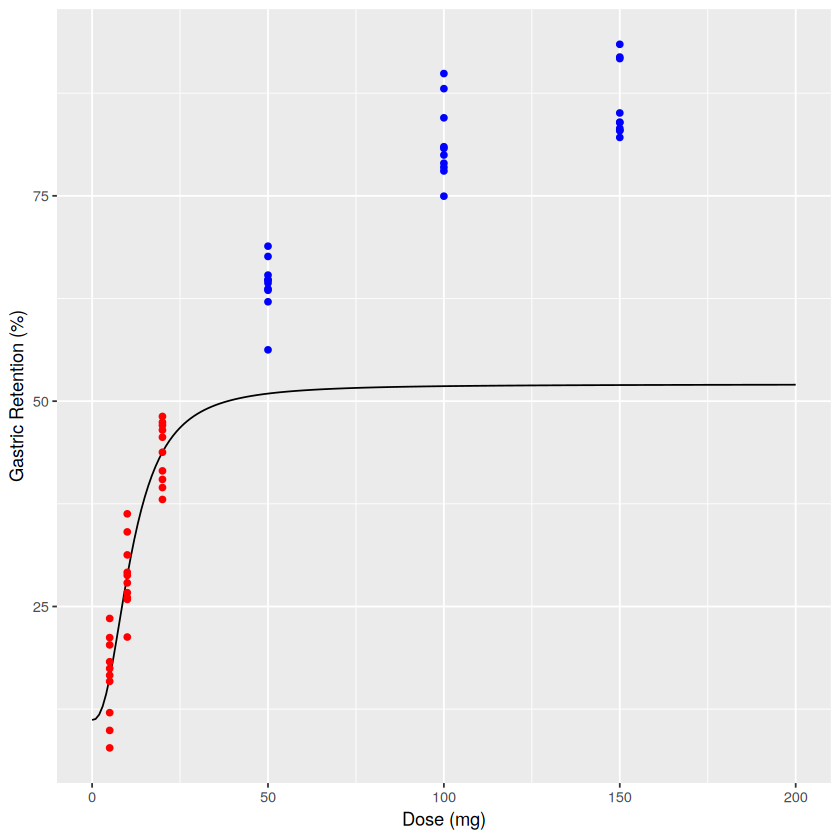

In [117]:
# Create a sequence of dose levels
dose_levels <- seq(0, 200, by = 1)

# Predict gastric retention for the sequence of dose levels
predictions <- predict(model, data.frame(Dose = dose_levels))

# # Plot the model predictions and observed data
# plot(model)


df <- data.frame(Dose = dose_levels, GE_content = predictions)
ggplot(df, aes(x = Dose, y = GE_content)) +
  geom_line() +
   geom_point(data = data_nu_transformed, aes(x = Dose, y = GE_content), color = "blue") +
 
  geom_point(data = data_low, aes(x = Dose, y = GE_content), color = "red") +
  labs(x = "Dose (mg)", y = "Gastric Retention (%)")

In [ ]:
# model using a different function
model_update <- drm(GE_content ~ Dose, data = data_low, 
                    fct = LL.3(names = c("Hill slope", "Min", "EC50")))


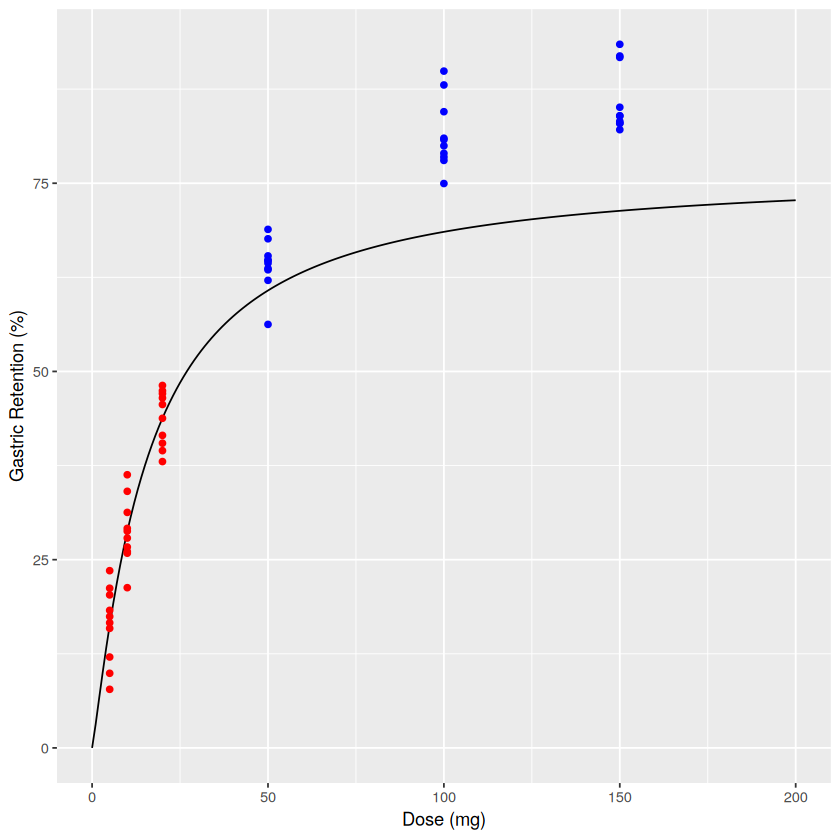

In [119]:
# Create a sequence of dose levels
dose_levels <- seq(0, 200, by = 1)

# Predict gastric retention for the sequence of dose levels
predictions <- predict(model_update, data.frame(Dose = dose_levels))

# # Plot the model predictions and observed data
# plot(model)


df <- data.frame(Dose = dose_levels, GE_content = predictions)
ggplot(df, aes(x = Dose, y = GE_content)) +
  geom_line() +
   geom_point(data = data_nu_transformed, aes(x = Dose, y = GE_content), color = "blue") +
 
  geom_point(data = data_low, aes(x = Dose, y = GE_content), color = "red") +
  labs(x = "Dose (mg)", y = "Gastric Retention (%)")

In [139]:
# model using a different function
model_update <- drm(GE_content ~ Dose, data = data_low, 
                    fct = LL.2(names = c("Hill slope", "EC50")))


Warning message in sqrt(diag(varMat)):
“NaNs produced”


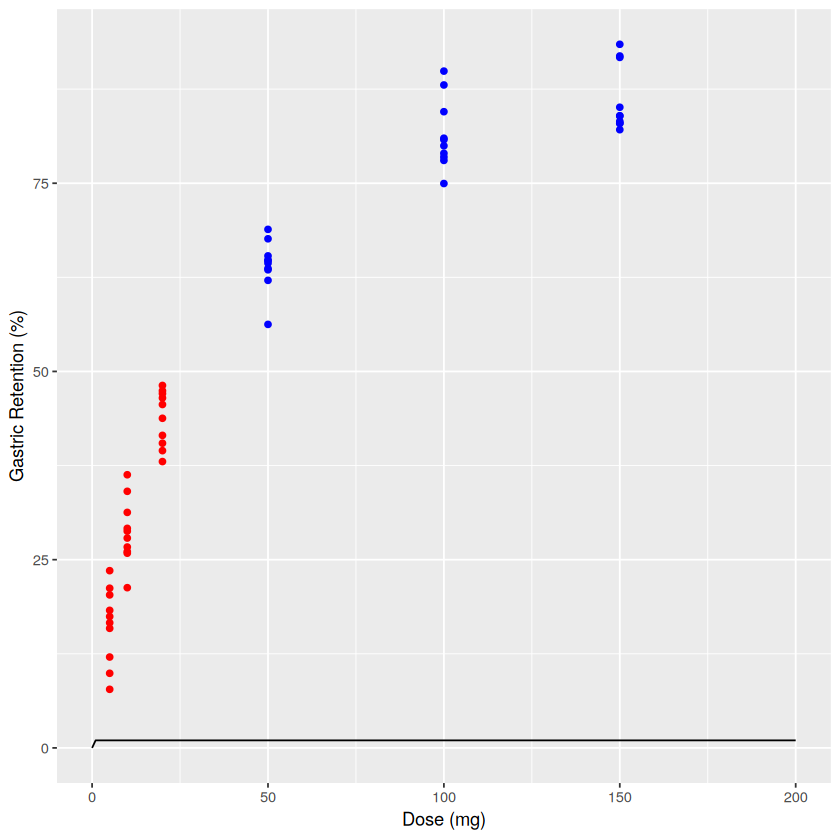

In [140]:
# Create a sequence of dose levels
dose_levels <- seq(0, 200, by = 1)

# Predict gastric retention for the sequence of dose levels
predictions <- predict(model_update, data.frame(Dose = dose_levels))

# # Plot the model predictions and observed data
# plot(model)


df <- data.frame(Dose = dose_levels, GE_content = predictions)
ggplot(df, aes(x = Dose, y = GE_content)) +
  geom_line() +
   geom_point(data = data_nu_transformed, aes(x = Dose, y = GE_content), color = "blue") +
 
  geom_point(data = data_low, aes(x = Dose, y = GE_content), color = "red") +
  labs(x = "Dose (mg)", y = "Gastric Retention (%)")

In [128]:
getMeanFunctions()

Log-logistic (ED50 as parameter) with lower limit at 0 and upper limit at 1 
(2 parameters) 
In 'drc':  LL.2 

Log-logistic (ED50 as parameter) with lower limit at 0 
(3 parameters) 
In 'drc':  LL.3 

Log-logistic (ED50 as parameter) with upper limit at 1 
(3 parameters) 
In 'drc':  LL.3u 

Log-logistic (ED50 as parameter) 
(4 parameters) 
In 'drc':  LL.4 

Generalized log-logistic (ED50 as parameter) 
(5 parameters) 
In 'drc':  LL.5 

Weibull (type 1) with lower limit at 0 and upper limit at 1 
(2 parameters) 
In 'drc':  W1.2 

Weibull (type 1) with lower limit at 0 
(3 parameters) 
In 'drc':  W1.3 

Weibull (type 1) 
(4 parameters) 
In 'drc':  W1.4 

Weibull (type 2) with lower limit at 0 and upper limit at 1 
(2 parameters) 
In 'drc':  W2.2 

Weibull (type 2) with lower limit at 0 
(3 parameters) 
In 'drc':  W2.3 

Weibull (type 2) 
(4 parameters) 
In 'drc':  W2.4 

Brain-Cousens (hormesis) with lower limit fixed at 0 
(4 parameters) 
In 'drc':  BC.4 

Brain-Cousens (hormesis) 
(5 p